## Imports

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from keras.datasets import mnist
from google.colab import drive

## Set up Google Drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Initialize CenSurE detector

In [ ]:
star = cv.xfeatures2d.StarDetector_create()

## Initialize FAST detector

In [ ]:
fast = cv.FastFeatureDetector_create()

## Initialize BRIEF extractor

In [ ]:
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

## Example \#1: perfume bottles

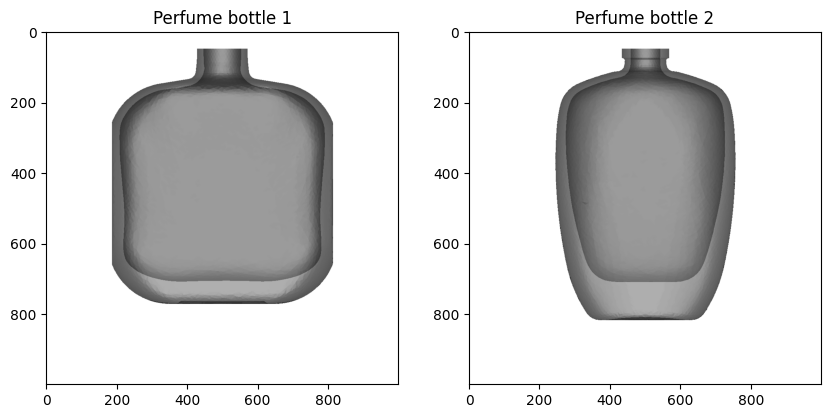

In [ ]:
bottle1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/Flacon 1.png')
bottle2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/Flacon 2.png')

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1, cmap="gray")
axes[0].set_title("Perfume bottle 1")
axes[1].imshow(bottle2, cmap="gray")
axes[1].set_title("Perfume bottle 2")

plt.show()

18 keypoints found for the first perfume bottle

21 keypoints found for the second perfume bottle



Text(0.5, 1.0, 'Perfume bottle 2 - 21 keypoints found')

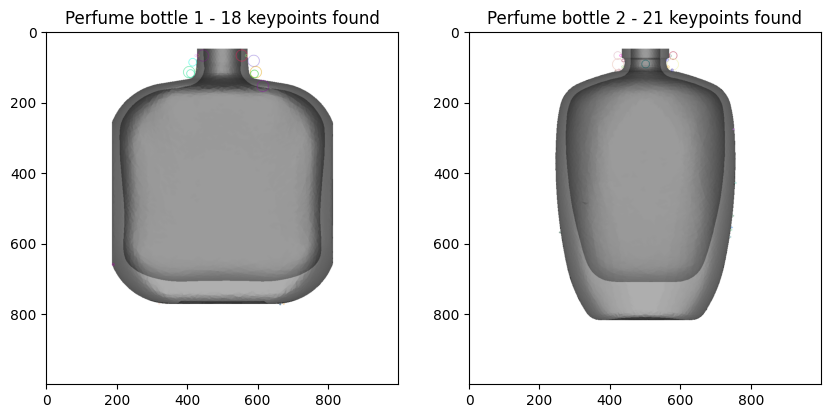

In [ ]:
bottle1_keypoints_star = star.detect(bottle1, None)
bottle2_keypoints_star = star.detect(bottle2, None)

bottle1_with_keypoints = cv.drawKeypoints(bottle1, bottle1_keypoints_star, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
bottle2_with_keypoints = cv.drawKeypoints(bottle2, bottle2_keypoints_star, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("{} keypoints found for the first perfume bottle".format(len(bottle1_keypoints_star)))
print("\n{} keypoints found for the second perfume bottle\n".format(len(bottle2_keypoints_star)))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1_with_keypoints, cmap="gray")
axes[0].set_title("Perfume bottle 1 - {} keypoints found".format(len(bottle1_keypoints_star)))
axes[1].imshow(bottle2_with_keypoints, cmap="gray")
axes[1].set_title("Perfume bottle 2 - {} keypoints found".format(len(bottle2_keypoints_star)))

321 keypoints found for the first perfume bottle

312 keypoints found for the second perfume bottle



Text(0.5, 1.0, 'Perfume bottle 2 - 312 keypoints found')

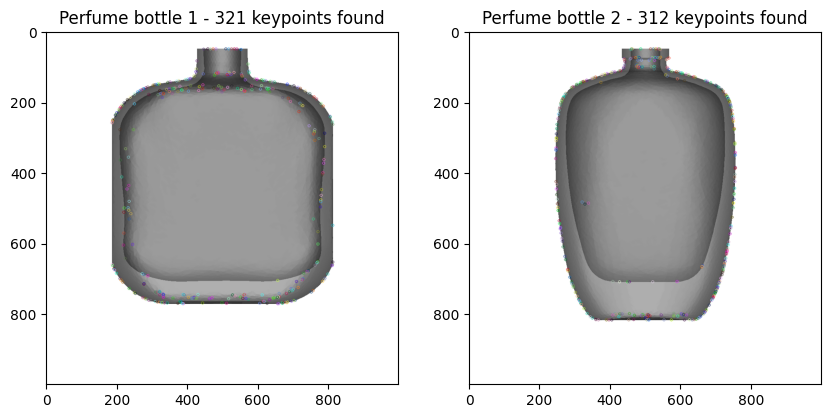

In [ ]:
bottle1_keypoints_fast = fast.detect(bottle1, None)
bottle2_keypoints_fast = fast.detect(bottle2, None)

bottle1_with_keypoints = cv.drawKeypoints(bottle1, bottle1_keypoints_fast, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
bottle2_with_keypoints = cv.drawKeypoints(bottle2, bottle2_keypoints_fast, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("{} keypoints found for the first perfume bottle".format(len(bottle1_keypoints_fast)))
print("\n{} keypoints found for the second perfume bottle\n".format(len(bottle2_keypoints_fast)))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1_with_keypoints, cmap="gray")
axes[0].set_title("Perfume bottle 1 - {} keypoints found".format(len(bottle1_keypoints_fast)))
axes[1].imshow(bottle2_with_keypoints, cmap="gray")
axes[1].set_title("Perfume bottle 2 - {} keypoints found".format(len(bottle2_keypoints_fast)))

321 keypoints found for the first perfume bottle

312 keypoints found for the second perfume bottle



Text(0.5, 1.0, 'Perfume bottle 2 - 312 keypoints found')

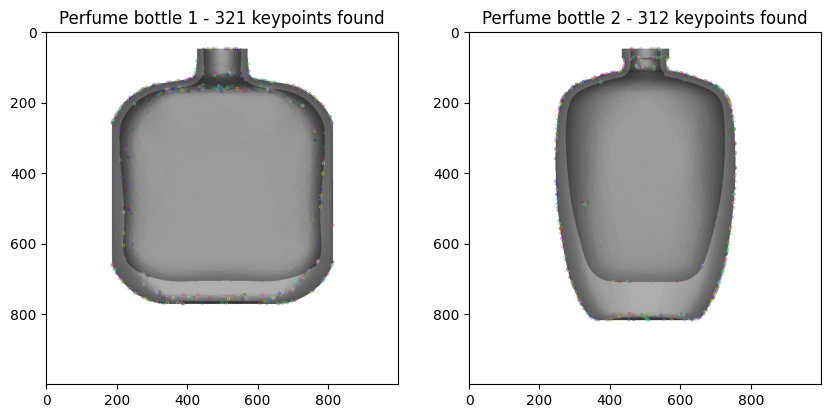

In [ ]:
bottle1_keypoints_brief, bottle1_descriptors_brief = brief.compute(bottle1, bottle1_keypoints_fast)
bottle2_keypoints_brief, bottle2_descriptors_brief = brief.compute(bottle2, bottle2_keypoints_fast)

bottle1_with_keypoints = cv.drawKeypoints(bottle1, bottle1_keypoints_brief, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
bottle2_with_keypoints = cv.drawKeypoints(bottle2, bottle2_keypoints_brief, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("{} keypoints found for the first perfume bottle".format(len(bottle1_keypoints_brief)))
print("\n{} keypoints found for the second perfume bottle\n".format(len(bottle2_keypoints_brief)))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1_with_keypoints, cmap="gray")
axes[0].set_title("Perfume bottle 1 - {} keypoints found".format(len(bottle1_keypoints_brief)))
axes[1].imshow(bottle2_with_keypoints, cmap="gray")
axes[1].set_title("Perfume bottle 2 - {} keypoints found".format(len(bottle2_keypoints_brief)))

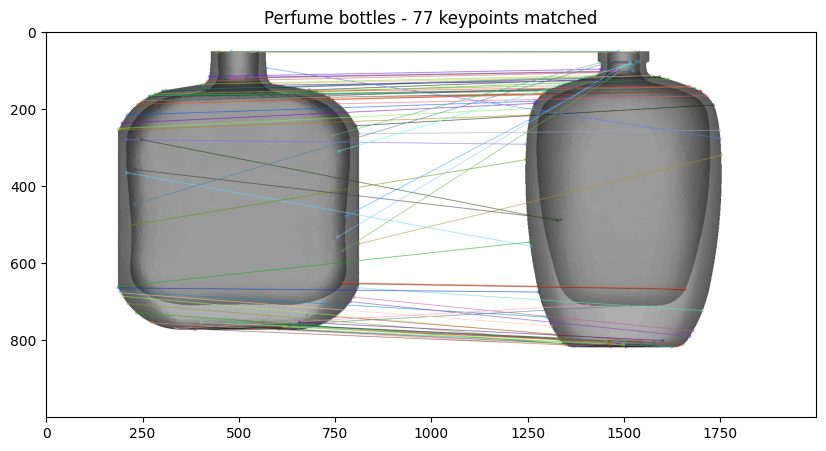

In [ ]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

bottleMatches = bf.match(bottle1_descriptors_brief, bottle2_descriptors_brief)
bottleMatches = sorted(bottleMatches, key = lambda x:x.distance)

bottleMatchingImg = cv.drawMatches(bottle1, bottle1_keypoints_brief, bottle2, bottle2_keypoints_brief, bottleMatches, bottle2, flags=2)

plt.figure(figsize=(10, 5))
plt.title("Perfume bottles - {} keypoints matched".format(len(bottleMatches)))
plt.imshow(bottleMatchingImg)